PCA

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

np.random.seed(0)
n_samples = 100
n_features = 10
X = np.random.randn(n_features, n_features)

In [3]:
n_components = 1
pca = PCA(n_components=n_components)




In [4]:
X_pca = pca.fit_transform(X)

In [5]:
X_original = pca.inverse_transform(X_pca)


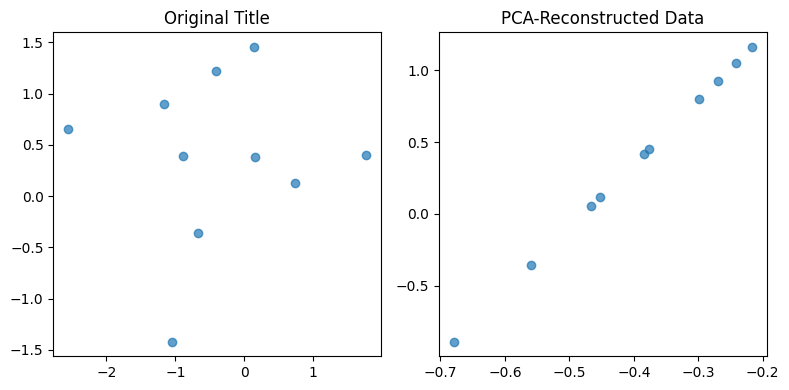

In [6]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], alpha=0.7)
plt.title('Original Title')
plt.subplot(1,2,2)
plt.scatter(X_original[:,0],X_original[:,1], alpha=0.7)
plt.title('PCA-Reconstructed Data')
plt.tight_layout()
plt.show()

K-Mean Visualization

In [7]:
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

text_data = ['k-means clustering is a method of vector quantization',
              'originally from signal processing', 
              'that aims to partition n observations into k clusters in which each observation belongs to cluster with nearest mean'] 
               
def preprocess_text(text_data):
    stop_words = set(stopwords.words('english'))
    preprocessed_data = []
    for text in text_data:
        words = word_tokenize(text.lower())
        filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
        preprocessed_data.append(filtered_words)
    return preprocessed_data
preprocessed_data = preprocess_text(text_data)   
unique_words = sorted(set(word for sublist in preprocessed_data for word in sublist))
one_hot_vectors = np.zeros((len(preprocessed_data),len(unique_words)))
for i, words in enumerate(preprocessed_data):
    for word in words:
        one_hot_vectors[i, unique_words.index(word)] = 1



[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


C:\Users\Aarya Gupta\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


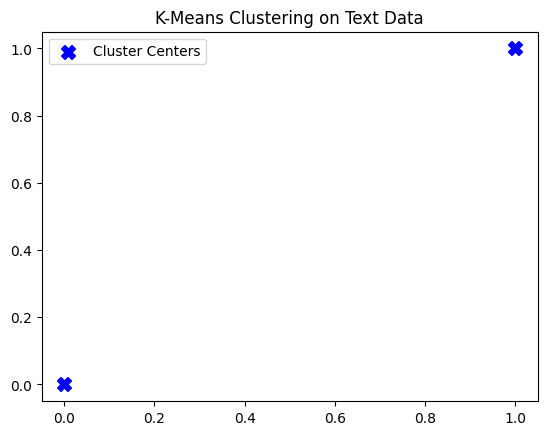

In [9]:
k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(one_hot_vectors)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(centers[:,0], centers[:,1], c='blue', marker='X', s=100, label='Cluster Centers')
plt.title('K-Means Clustering on Text Data')
plt.legend()
plt.show()